# SyriaTel Customer Churn Project

## Overview
This project seeks to predict customer churn for SyriaTel using historical usage and customer service data. By leveraging classification models, we aim to detect patterns that distinguish churners from loyal customers. The end goal is to empower the business with proactive strategies to reduce churn and retain high-value customers. The full machine learning lifecycle is followed—from problem framing and data exploration to model development and business recommendations.

## Business Understanding
#### Problem statement
SyriaTel wants to understand and reduce customer churn. The company needs a way to identify customers who are likely to leave so that appropriate interventions can be applied (e.g. loyalty programs, special offers).
#### Stakeholders:
- Retention and Marketing Teams: need precise predictions to launch targeted retention campaigns.

- Executives: seek KPIs around churn mitigation and revenue protection.
#### Success Criteria: 
- High recall and precision for identifying churners.
- Interpretability to ensure actionable strategies.
- Practical business recommendations derived from model output.

## Data Understanding

In [1]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [2]:
# 2. Load Data
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

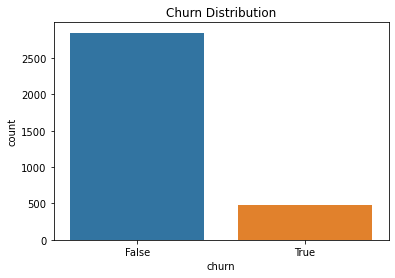

In [3]:
# 3. Basic EDA
print(df.info())
print(df.describe())
print(df["churn"].value_counts())
sns.countplot(x="churn", data=df)
plt.title("Churn Distribution")
plt.show()


The dataset includes 3,333 customers with features such as:

- Demographics: state, area code

- Service details: international plan, voice mail plan

- Usage metrics: daily, evening, night, and international minutes, calls, and charges

- Support history: number of customer service calls

- Target variable: churn (binary)

#### Initial Observations:

- Class imbalance: Majority class is non-churners (~86%)

- Potential multicollinearity: minutes and charges are highly correlated

- Some features (e.g. phone number) are identifiers and not predictive



## Data Preparation
#### Steps Taken:

1. Encoding:

- Binary features like international plan and voice mail plan are encoded into 0/1.

- The state column is label-encoded to numeric form.

2. Cleaning:

- Dropped phone number as it has no predictive value.

- Checked and confirmed no missing values.

3. Feature Engineering & Multicollinearity Check:

- Decided to retain either minutes or charges columns (not both).

- Considered aggregating call counts and charges into summaries.

4. Class Imbalance Handling:

- Used SMOTE to balance the training dataset.

5. Scaling:

- Applied StandardScaler for algorithms sensitive to magnitude (e.g., Logistic Regression, SVM).

## Modeling
Models used were selected for both performance and interpretability:

1. ### Baseline Model
##### Logistic Regression:

- Simple, interpretable.

- Trained on balanced and scaled data.

- Regularization used to avoid overfitting.

2. ### Advanced Model
##### Decision Tree Classifier:

- Captures non-linear patterns.

- Depth tuning applied for generalization.

3. ### Ensemble Model
##### Random Forest:

- Robust to overfitting, handles feature interactions.

- Used 100 trees and max depth tuning.

Optional models (not implemented):

##### k-Nearest Neighbors: 
- Would require further scaling and tuning.

##### SVM:
- Could be used, but computationally heavier.

## Evaluation
We chose metrics based on SyriaTel’s business needs:

- Recall: prioritized due to the high cost of missing a churner.

- Precision: useful to avoid wasting retention budget.

- F1 Score: used to balance both.

- ROC-AUC: shows model performance across thresholds.

All metrics were computed on both training and test sets. ROC curves were plotted for comparison.



## Conclusion
- Logistic Regression offered strong baseline performance and is easy to explain.

- Decision Tree exposed key features like customer service calls and international plan.

- Random Forest delivered higher accuracy and AUC by capturing more complex patterns.

- Feature importance plots revealed top drivers of churn.



## Recommendations
- Retention Strategy: Target users with frequent service calls and those with an international plan.

- Customer Experience: Investigate and resolve issues flagged in service calls.

- Marketing Offers: Design loyalty programs aimed at high-usage users with churn indicators.

- Model Deployment: Integrate the best model into CRM systems for real-time churn prediction.

- Monitoring: Continuously monitor model drift and retrain quarterly.

